<a href="https://colab.research.google.com/github/anuragvishwakarma02hotmail/12AprilExercise/blob/main/EY_ClassificationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Complete the notebook to perform

# Data Exploration

# Feature Engineering

# Model Training and Evaluation to select the best model


import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY8Apr2024-AI-Batch2/main/diabetes.csv')
data.head()

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

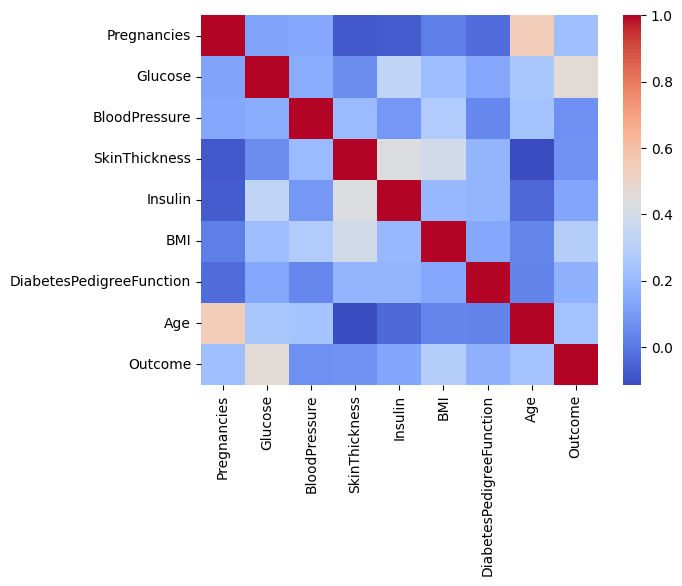

In [112]:
#HeatMap
import seaborn as sns
cors=data.corr() #All data are numbers
sns.heatmap(cors, cmap = 'coolwarm')

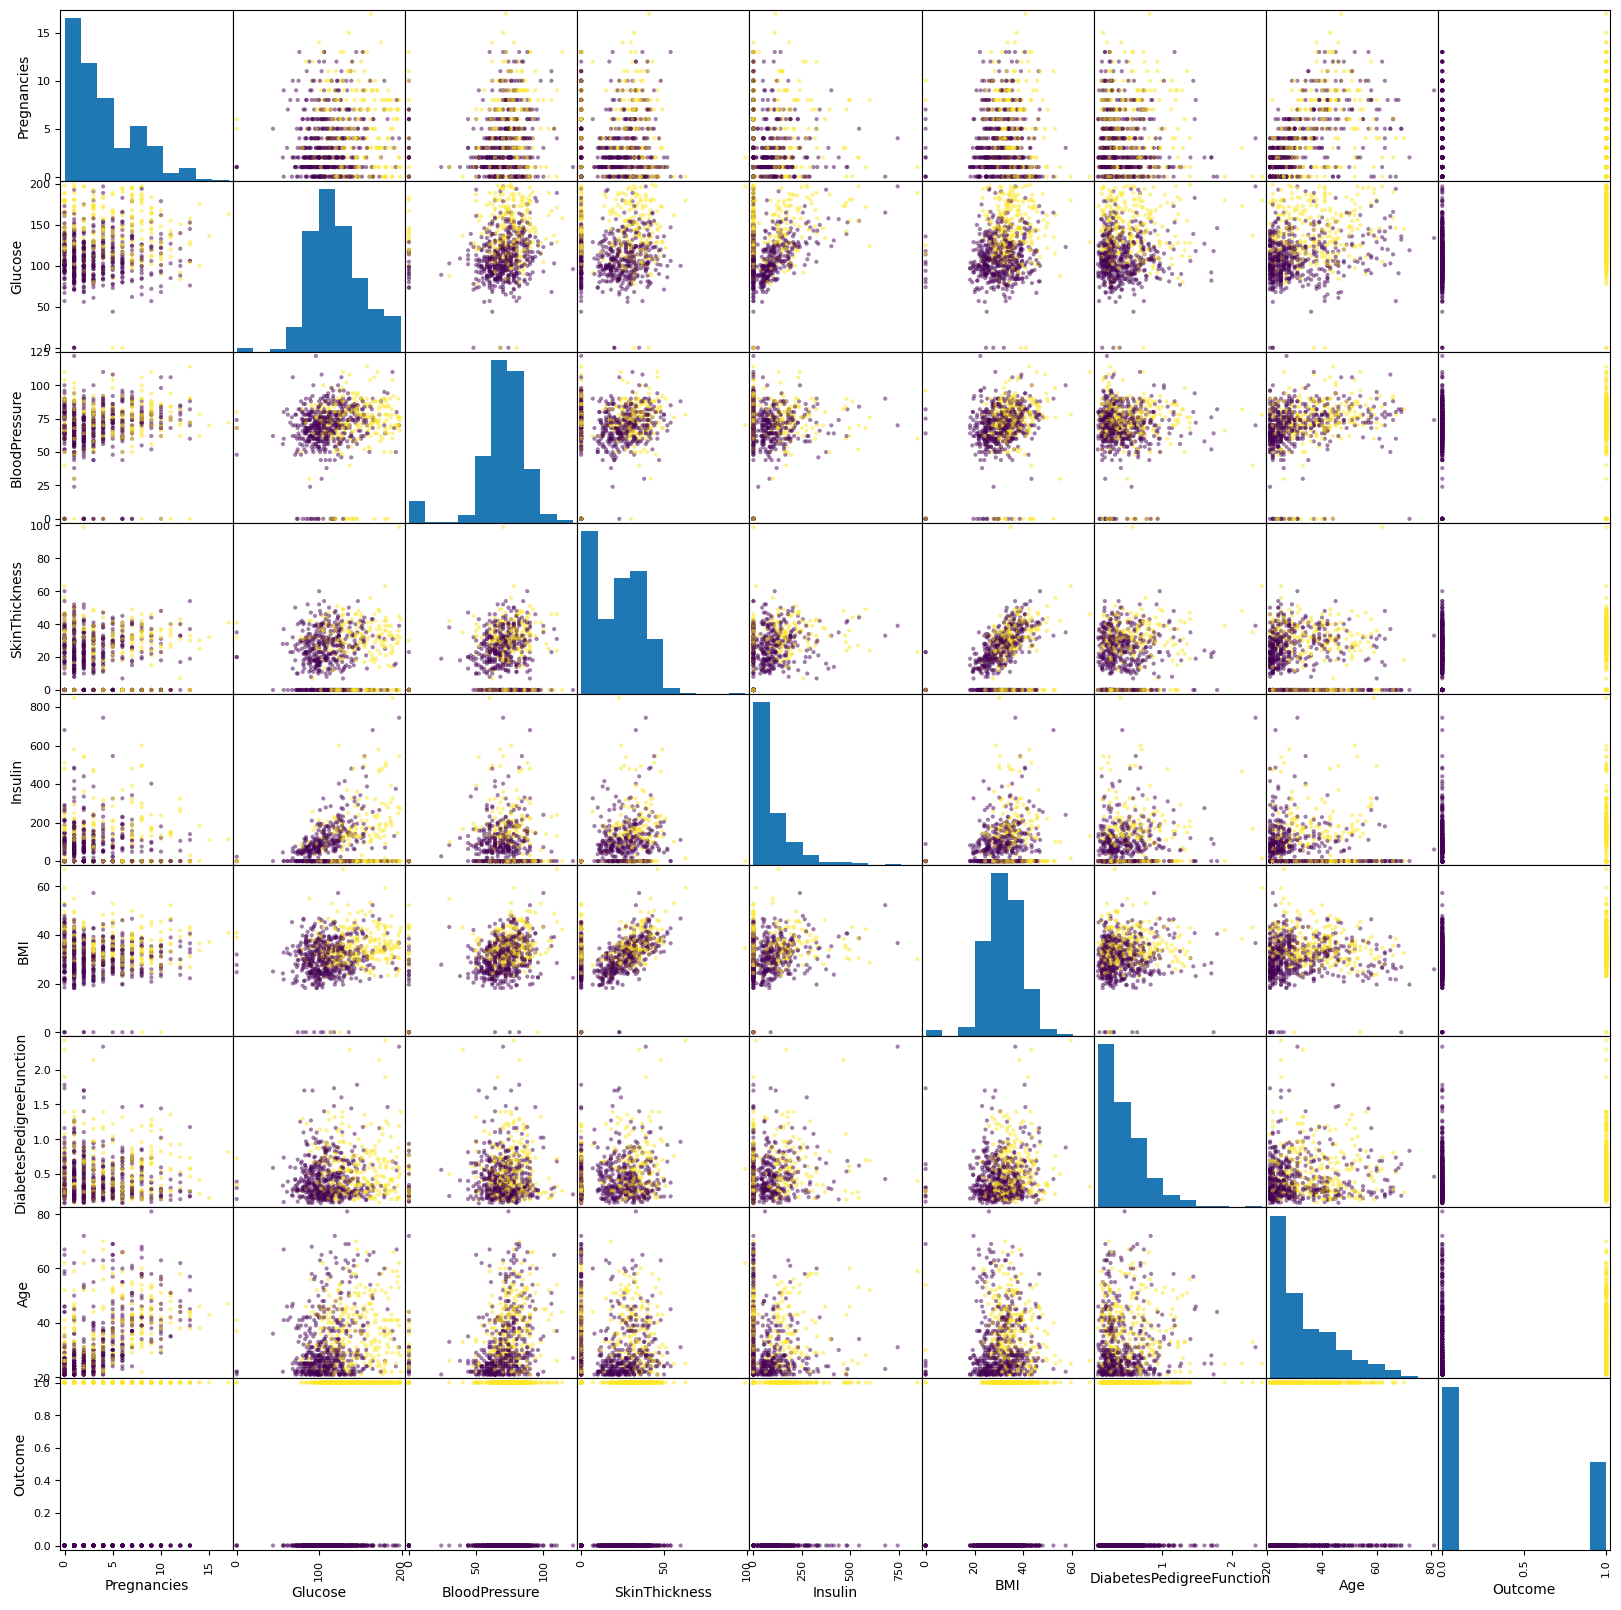

In [113]:
y=data["Outcome"]
sm = pd.plotting.scatter_matrix(data, c=y ,figsize=(20,20))

In [114]:
#Split in to 70:30
#Seperate output columns
x = data.iloc[:,:-1]
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [115]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [116]:
# print(xtrain.head(5))
# print(ytrain.head(5))
# print(xtest.head(5))
print(ytest.head(5))

192    1
171    1
112    0
423    0
247    0
Name: Outcome, dtype: int64


In [117]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [118]:
# Using z-score  mu- mean  and sigma -std

mu = xtrain.describe().T['mean']

sigma = xtrain.describe().T['std']
print(mu)
print("--------------------")
print(sigma)



Pregnancies                   3.983240
Glucose                     120.540037
BloodPressure                69.757914
SkinThickness                20.836127
Insulin                      78.504655
BMI                          32.154190
DiabetesPedigreeFunction      0.469505
Age                          32.962756
Name: mean, dtype: float64
--------------------
Pregnancies                   3.331456
Glucose                      33.025527
BloodPressure                18.485499
SkinThickness                16.015476
Insulin                     110.324946
BMI                           7.483037
DiabetesPedigreeFunction      0.326388
Age                          11.187618
Name: std, dtype: float64


In [119]:
#normalize the data for training and testing

xtrain_norm = (xtrain - mu) / sigma
xtest_norm = (xtest - mu) / sigma

In [120]:
print(xtrain_norm.max())
print("---------------------------")
print(xtrain_norm.min())
print("---------------------------")
print(xtest_norm.max())
print("---------------------------")
print(xtest_norm.min())


Pregnancies                 3.907228
Glucose                     2.375737
BloodPressure               2.826112
SkinThickness               4.880521
Insulin                     6.032138
BMI                         3.360375
DiabetesPedigreeFunction    5.697184
Age                         4.293787
dtype: float64
---------------------------
Pregnancies                -1.195645
Glucose                    -3.649905
BloodPressure              -3.773656
SkinThickness              -1.300999
Insulin                    -0.711577
BMI                        -4.296944
DiabetesPedigreeFunction   -1.199505
Age                        -1.069285
dtype: float64
---------------------------
Pregnancies                 3.006721
Glucose                     2.254618
BloodPressure               2.176954
SkinThickness               2.632696
Insulin                     6.956680
BMI                         4.670004
DiabetesPedigreeFunction    5.975993
Age                         3.489326
dtype: float64
-----------

In [121]:
#Checking outliers in all xtrain

outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]


all_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,isOutlier
489,1.205707,2.224339,0.554061,-1.300999,-0.711577,-0.809055,0.249688,3.042403,1
537,-1.195645,-1.923967,-0.527869,-1.300999,-0.711577,-1.397052,0.813434,3.042403,1
193,2.106214,0.437842,-3.773656,-1.300999,-0.711577,2.692197,0.332412,0.629021,1
533,0.605369,-0.894461,-3.773656,-1.300999,-0.711577,-0.314604,0.096496,-0.175440,1
415,-0.295138,1.588467,0.770446,0.759507,3.584822,0.473846,-0.648015,-0.979901,1
60,-0.595307,-1.106418,-3.773656,-1.300999,-0.711577,-4.296944,-0.507079,-1.069285,2
622,0.605369,1.891263,1.311411,-1.300999,-0.711577,1.155388,3.037777,1.075943,1
753,-1.195645,1.830704,0.986832,1.446343,3.911131,1.489477,-0.758313,-0.622363,1
298,3.006721,-0.621944,0.445868,0.259991,0.956224,0.594118,-0.176185,1.165328,1
392,-0.895476,0.316724,-0.311483,-0.426845,3.050039,-1.129781,-0.246653,-1.069285,1


In [122]:
print(all_outliers.index," len-",len(all_outliers.index))

Index([489, 537, 193, 533, 415,  60, 622, 753, 298, 392,   7, 336, 261, 123,
         9, 666, 430, 228, 645, 486, 584, 332, 593, 601, 535, 349, 347, 655,
         4, 706, 330,  88, 125, 300, 579, 182,  78, 357, 145, 502, 266,  81,
       484, 159,   8, 643, 363, 342, 286, 459, 222, 673, 370,  58, 172, 621,
       186],
      dtype='int64')  len- 57


In [123]:
#Updating all outliers to 3 or -3 in xtrain

for myindex in all_outliers.index:
  for col_name in xtrain_norm.columns:
    datapoint = xtrain_norm.loc[myindex, [col_name]]
    if(datapoint[0] > 3):
      xtrain_norm.loc[myindex, [col_name]] = 3.0

    if( datapoint[0] < -3 ):
      xtrain_norm.loc[myindex, [col_name]] = -3.0

# check again if any outliers are still present
outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]
xtrain_norm = xtrain_norm.iloc[:, :-1]

print('Pending outliers = ',all_outliers.index)

xtrain_norm.columns

Pending outliers =  Index([], dtype='int64')


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [125]:
print(xtrain_norm.max())
print("---------------------------")
print(xtrain_norm.min())
print("---------------------------")
print(xtest_norm.max())
print("---------------------------")
print(xtest_norm.min())

##Outliers left on xtest


Pregnancies                 3.000000
Glucose                     2.375737
BloodPressure               2.826112
SkinThickness               3.000000
Insulin                     3.000000
BMI                         3.000000
DiabetesPedigreeFunction    3.000000
Age                         3.000000
dtype: float64
---------------------------
Pregnancies                -1.195645
Glucose                    -3.000000
BloodPressure              -3.000000
SkinThickness              -1.300999
Insulin                    -0.711577
BMI                        -3.000000
DiabetesPedigreeFunction   -1.199505
Age                        -1.069285
dtype: float64
---------------------------
Pregnancies                 3.006721
Glucose                     2.254618
BloodPressure               2.176954
SkinThickness               2.632696
Insulin                     6.956680
BMI                         4.670004
DiabetesPedigreeFunction    5.975993
Age                         3.489326
dtype: float64
-----------

In [126]:
print(xtest_norm)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
192     0.905538  1.164553      -0.203290      -1.300999 -0.711577 -0.234422   
171     0.605369  0.407562       0.013096       0.135111  0.466761  0.433756   
112    -0.895476 -0.955020       0.337675       0.821947 -0.376204 -0.127514   
423    -0.595307 -0.167750      -0.311483       0.072672 -0.711577 -0.180968   
247    -1.195645  1.346230       1.095025       0.759507  5.452034  2.692197   
..           ...       ...            ...            ...       ...       ...   
292    -0.595307  0.225885       0.445868       1.009266  0.938096  1.489477   
29      0.305200 -0.107191       1.203218      -1.300999 -0.711577  0.260029   
10      0.005031 -0.319148       1.203218      -1.300999 -0.711577  0.727754   
294    -1.195645  1.225112      -1.068833      -1.300999 -0.711577 -1.370325   
487    -1.195645  1.588467       0.445868       0.697068  1.690419  1.917111   

     DiabetesPedigreeFunction       Age

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# in case of trees-> we could fluctuate the depth of tree
# in case of ensembles (forests or jungles) -> we could fluctuate no. of trees

# Hyperparameters-> values that we adjust from our side as AI/ML engineers
# -> ASSUMPTIONS from our end
# -> these adjustments result in different models out of same algorithms!

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "DecisionTree10": DecisionTreeClassifier(max_depth=10),
    "DecisionTree200": DecisionTreeClassifier(max_depth=200),
    "DecisionTree50": DecisionTreeClassifier(max_depth=50),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "RandomForest100": RandomForestClassifier(n_estimators=100),
    "RandomForest200": RandomForestClassifier(n_estimators=200),
    "RandomForest300": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
    "Support Vector Machines with RBF": SVC(kernel='rbf')
}

In [128]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

best_model_acc = None
best_model_f1 = None
best_model_p = None
best_model_r = None

best_model_name_acc = ""
best_model_name_f1 = ""
best_model_name_p = ""
best_model_name_r = ""

best_acc = -1
best_f1 = -1
best_precision = -1
best_recall = -1


all_accs = []
all_f1_scores = []
all_precions = []
all_recalls = []



In [129]:
for algo_name, algo in my_algos.items():
  print('Algorithm considered = ' + algo_name)
  model = algo
  model.fit(xtrain_norm, ytrain)
  p = model.predict(xtest_norm)
  a_score = accuracy_score(p, ytest)
  p_score = precision_score(p, ytest)
  r_score = recall_score(p, ytest)
  f_score = f1_score(p, ytest)


  all_accs.append(a_score)
  all_f1_scores.append(f_score)
  all_precions.append(p_score)
  all_recalls.append(r_score)
  print('Accuracy = ' + str(a_score))
  print('Precision = ' + str(p_score))
  print('Recall = ' + str(r_score))
  print('F1 Score = ' + str(f_score))


  if a_score == 1.0: # if any model is 100% accurate, its a sign of overfitting
    print('Overfitting')

  else:
    if a_score > best_acc:
      best_acc = a_score
      best_model_acc = algo
      best_model_name_acc = algo_name
    if f_score > best_f1:
      best_f1 = f_score

      best_model_f1 = algo
      best_model_name_f1 = algo_name
    if p_score > best_precision:
      best_precision = p_score
      best_model_p = algo
      best_model_name_p = algo_name
    if r_score > best_recall:
      best_recall = r_score
      best_model_r = algo
      best_model_name_r = algo_name
  print('*************')
  print()

Algorithm considered = DecisionTree100
Accuracy = 0.7272727272727273
Precision = 0.524390243902439
Recall = 0.6417910447761194
F1 Score = 0.5771812080536913
*************

Algorithm considered = DecisionTree10
Accuracy = 0.7056277056277056
Precision = 0.524390243902439
Recall = 0.5972222222222222
F1 Score = 0.5584415584415584
*************

Algorithm considered = DecisionTree200
Accuracy = 0.7012987012987013
Precision = 0.5121951219512195
Recall = 0.5915492957746479
F1 Score = 0.5490196078431372
*************

Algorithm considered = DecisionTree50
Accuracy = 0.70995670995671
Precision = 0.47560975609756095
Recall = 0.6190476190476191
F1 Score = 0.5379310344827587
*************

Algorithm considered = RandomForest10
Accuracy = 0.7705627705627706
Precision = 0.5487804878048781
Recall = 0.7377049180327869
F1 Score = 0.6293706293706294
*************

Algorithm considered = RandomForest100
Accuracy = 0.7748917748917749
Precision = 0.5975609756097561
Recall = 0.7205882352941176
F1 Score = 0.

In [130]:

print(best_model_name_acc,best_model_acc)

RandomForest100 RandomForestClassifier()


In [131]:
#saving model file
import pickle
pickle.dump(best_model_acc, open("model.pkl", 'wb'))